In [12]:
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style("white")

In [13]:
vietnam_articles = pd.read_json("../data/preprocessed/VietnamTranslated/articles.json")
print(f"Number of articles: {len(vietnam_articles)}")
vietnam_articles.head()

Number of articles: 117536


,document_id,article_name,article_content
0,04/2017/TT-BTTTT,chapter 1,1. This Circular stipulates the implementation...
1,04/2017/TT-BTTTT,chapter 2,"1. For the bands 824-835 MHz, 869-880 MHz, tel..."
2,04/2017/TT-BTTTT,chapter 3,"1. This Circular takes effect from June 9, 201..."
3,31/CP,chapter 1,Nghia Lo town has a natural area of 878.5 hect...
4,31/CP,chapter 2,1. Pu Trang ward was established on the basis ...


In [14]:
vietnam_queries = pd.read_json("../data/preprocessed/VietnamTranslated/query_article.json")
print(f"Number of queries: {len(vietnam_queries)}")
vietnam_queries.head()

Number of queries: 5922


,query,articles
0,Detecting fake signature in a notarized contra...,"[{'document_id': '53/2014/QH13', 'article_name..."
1,Can a husband authorize his wife to sell/trans...,"[{'document_id': '91/2015/QH13', 'article_name..."
2,Will the person inheriting according to the wi...,"[{'document_id': '91/2015/QH13', 'article_name..."
3,For the transaction participants who are illit...,"[{'document_id': '53/2014/QH13', 'article_name..."
4,Time limit for division of inheritance?,"[{'document_id': '91/2015/QH13', 'article_name..."


In [24]:
len_articles = vietnam_articles.article_content.map(lambda x: len(x))
len_articles = len_articles[len_articles < 10000]
len_articles[:10].tolist()

[594, 1494, 1733, 329, 1969, 78, 217, 1006, 1208, 728]

In [25]:
len_queries = vietnam_queries['query'].map(lambda x: len(x))
len_queries[:10].tolist()

[94, 59, 176, 92, 39, 44, 59, 85, 110, 74]

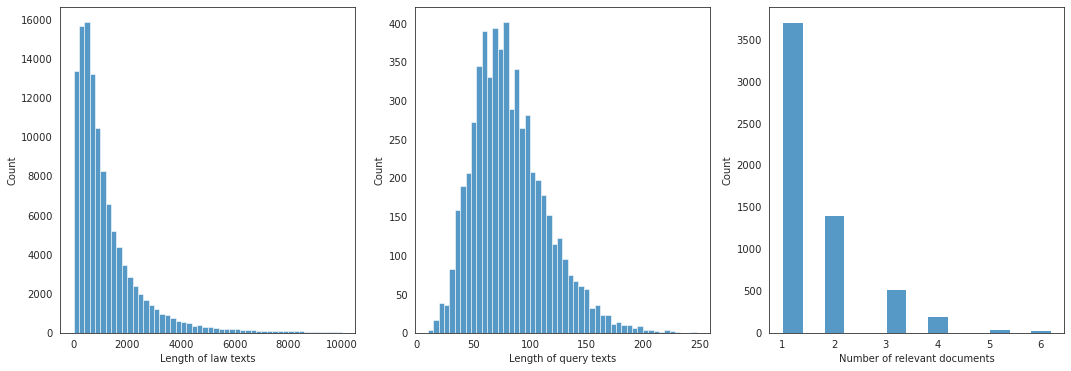

In [37]:
num_answers = vietnam_queries.articles.map(lambda lst: len(lst))
num_answers = num_answers[num_answers < 7]
f, ax = plt.subplots(ncols=3, figsize=(18, 6))
sns.histplot(len_articles, ax=ax[0], bins=50)
ax[0].set(xlabel="Length of law texts")
ax[0].grid(False)
sns.histplot(len_queries, ax=ax[1], bins=50)
ax[1].set(xlabel="Length of query texts",)
ax[1].grid(False)
sns.histplot(num_answers, ax=ax[2], binwidth=0.4)
ax[2].set(xlabel="Number of relevant documents")
ax[2].grid(False)
plt.savefig('../figures/vietnam_graphs.png', bbox_inches='tight')
plt.show()